In [ ]:
!pip install datamol
!pip install rdkit

In [3]:
import pandas as pd

In [10]:
# Set Pandas options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [11]:
import matplotlib.pyplot as plt
import datamol as dm
import pandas as pd

In [18]:
df=pd.DataFrame(pd.read_csv("Pancr_Cell.csv"))

In [19]:
df['SMILES'].sample(5)

596    CS(=O)(=O)C1=CC(Cl)=C(C=C1)C(=O)NC1=CC=C(Cl)C(...
571    CNC(=O)C1=C(SC2=CC=C3C(NN=C3\C=C\C3=CC=CC=N3)=...
578    CN(C)C\C=C\C(=O)NC1=C(O[C@H]2CCOC2)C=C2N=CN=C(...
564    CNC(=O)C1=C(SC2=CC=C3C(NN=C3\C=C\C3=CC=CC=N3)=...
385    [H][C@@]1(C[C@@]2(O)[C@@H](OC(=O)C3=CC=CC=C3)[...
Name: SMILES, dtype: object

In [20]:
df.columns

Index(['Unnamed: 0', 'COSMIC_ID', 'CELL_LINE', 'DRUG_ID', 'DRUG_NAME',
       'PUTATIVE_TARGET', 'PATHWAY_NAME', 'LN_IC50', 'IC50', 'SMILES',
       ...
       'C56:8 TAG', 'C56:7 TAG', 'C56:6 TAG', 'C56:5 TAG', 'C56:4 TAG',
       'C56:3 TAG', 'C56:2 TAG', 'C58:8 TAG', 'C58:7 TAG', 'C58:6 TAG'],
      dtype='object', length=547)

Getting request from Pubchem to acquire data of compound

In [ ]:
df.shape

(595, 47)

In [ ]:
import requests

# List of compound names
compound_names = ["econazole", "miconazole", "propiconazole","flecainide"]

# Function to fetch SMILES from PubChem
def get_smiles(compound_name):
    base_url = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
    operation = "compound/name"
    response_format = "json"

    # Make the API request
    url = f"{base_url}/{operation}/{compound_name}/{response_format}"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        try:
            return data["PC_Compounds"][0]["props"][11]["value"]
        except (KeyError, IndexError):
            return "SMILES not found"
    else:
        return "API request failed"

# Fetch SMILES notations
smiles_list = []
for compound_name in compound_names:
    smiles = get_smiles(compound_name)
    smiles_list.append(smiles)

# Print or save the SMILES notations
for compound_name, smiles in zip(compound_names, smiles_list):
    print(f"{compound_name}: {smiles}")


econazole: {'sval': '1-[2-(4-chlorobenzyl)oxy-2-(2,4-dichlorophenyl)ethyl]imidazole'}
miconazole: {'sval': '1-[2-(2,4-dichlorobenzyl)oxy-2-(2,4-dichlorophenyl)ethyl]imidazole'}
propiconazole: {'sval': '1-[[2-(2,4-dichlorophenyl)-4-propyl-1,3-dioxolan-2-yl]methyl]-1,2,4-triazole'}
flecainide: {'sval': 'N-(2-piperidylmethyl)-2,5-bis(2,2,2-trifluoroethoxy)benzamide'}


Drawing Mol of SMILES

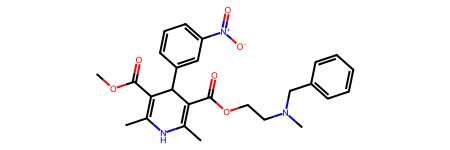

In [ ]:
# Mol from a smiles
mol = dm.to_mol("CC1=C(C(C(=C(N1)C)C(=O)OCCN(C)CC2=CC=CC=C2)C3=CC(=CC=C3)[N+](=O)[O-])C(=O)OC", sanitize=True)
mol

In [ ]:
# Morgan fingerprint
fp = dm.to_fp(mol)
fp

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
df3.columns

In [ ]:
# Generate a selfies
selfies = dm.to_selfies(mol)
selfies

'[C][O][C][=Branch1][C][=O][C][=C][Branch1][C][C][N][C][Branch1][C][C][=C][Branch2][Ring1][Branch1][C][=Branch1][C][=O][O][C][C][N][Branch1][C][C][C][C][=C][C][=C][C][=C][Ring1][=Branch1][C][Ring2][Ring1][=Branch1][C][=C][C][=C][C][Branch1][=Branch1][N+1][=Branch1][C][=O][O-1][=C][Ring1][=Branch2]'

In [ ]:
!pip install rdkit

Maximum Common Similarity

In [ ]:
import time
import random
from pathlib import Path

import pandas as pd
import numpy
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
from rdkit.Chem import Draw
from rdkit.Chem import rdFingerprintGenerator


In [ ]:
import pan

In [ ]:
df=pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Paper2/CYP_smiles_ALL.csv'))

In [ ]:
df.shape

(595, 47)

In [ ]:
df.columns

Index(['Observation\nnumber', 'CYP subtype', 'Compound name', 'pIC50',
       'SMILES', 'Molecular_Formula', 'Atom_Types', 'Bond_Types', 'Ring_Info',
       'Isotopes', 'Aromatic_Atoms', 'Chirality_Info', 'Overall_Charge',
       'Implicit_Hydrogens', 'Functional_Groups', 'Num_Rings',
       'Largest_Ring_Size', 'Smallest_Ring_Size', 'LogP', 'pKa', 'MolWt',
       'ExactMolWt', 'HeavyAtomCount', 'HeavyAtomMolWt', 'NHOHCount',
       'NOCount', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms',
       'NumRotatableBonds', 'NumValenceElectrons', 'NumAromaticRings',
       'NumSaturatedRings', 'NumAliphaticRings', 'NumAromaticHeterocycles',
       'NumSaturatedHeterocycles', 'NumAliphaticHeterocycles', 'RingCount',
       'FractionCSP3', 'TPSA', 'Veber_Passes', 'Ghose_Passes', 'Muegge_Passes',
       'Ro3_Passes', 'Egan_Passes', 'Ro2_Passes', 'Lipinski_Passes'],
      dtype='object')

In [ ]:
df1=pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Paper2/CYP_cluster_MACCSFinger.csv'))

In [ ]:
df1.shape

(595, 46)

In [ ]:
df1.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'CYP subtype', 'Compound name', 'pIC50',
       'Largest_Ring_Size', 'Smallest_Ring_Size', 'pKa', 'MolLogP', 'MolWt',
       'HeavyAtomCount', 'HeavyAtomMolWt', 'NHOHCount', 'NOCount',
       'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
       'NumValenceElectrons', 'NumAromaticRings', 'NumSaturatedRings',
       'NumAliphaticRings', 'NumAromaticHeterocycles',
       'NumSaturatedHeterocycles', 'NumAliphaticHeterocycles', 'RingCount',
       'FractionCSP3', 'TPSA', 'Veber_Passes', 'Ghose_Passes', 'Muegge_Passes',
       'Ro3_Passes', 'Egan_Passes', 'Ro2_Passes', 'Lipinski_Passes',
       'K_meansCluster', 'Family', 'Subfamily', 'Individual', 'SMILES',
       'MACCS', 'Fingerprint', 'mol', 'Morgan_Fingerprint',
       'Fingerprints_bit_vectors', 'Morgan_Fingerprint_SparseFinger'],
      dtype='object')

In [ ]:
df1.sample(20)

,Unnamed: 0.1,Unnamed: 0,CYP subtype,Compound name,pIC50,Largest_Ring_Size,Smallest_Ring_Size,pKa,MolLogP,MolWt,HeavyAtomCount,HeavyAtomMolWt,NHOHCount,NOCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,NumAromaticHeterocycles,NumSaturatedHeterocycles,NumAliphaticHeterocycles,RingCount,FractionCSP3,TPSA,Veber_Passes,Ghose_Passes,Muegge_Passes,Ro3_Passes,Egan_Passes,Ro2_Passes,Lipinski_Passes,K_meansCluster,Family,Subfamily,Individual,SMILES,MACCS,Fingerprint,mol,Morgan_Fingerprint,Fingerprints_bit_vectors,Morgan_Fingerprint_SparseFinger
142,142,142,CYP1A2,dantrolene,3.61,6,5,78.6371,1.7405,314.257,23,304.177,1,9,6,1,9,4,116,2,1,1,1,1,1,3,0.071429,118.05,1,1,0,0,1,0,1,1,1,A,2,C1C(=O)NC(=O)N1N=CC2=CC=C(O2)C3=CC=C(C=C3)[N+]...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",<rdkit.Chem.rdchem.Mol object at 0x7e5ff9772650>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ULongSparseInt...
553,553,553,CYP3A4,clonazepam,3.78,7,6,83.6841,3.0377,315.716,22,305.636,1,6,4,1,7,2,110,2,0,1,0,0,1,3,0.066667,84.60,1,1,0,0,1,0,1,1,3,A,4,C1C(=O)NC2=C(C=C(C=C2)[N+](=O)[O-])C(=N1)C3=CC...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",<rdkit.Chem.rdchem.Mol object at 0x7e5ff9689bd0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ULongSparseInt...


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd

fpgen = AllChem.GetMorganGenerator(radius=2)

# Assuming df1['SMILES'] contains SMILES strings
df1['mol'] = df1['SMILES'].apply(Chem.MolFromSmiles)
df1['Fingerprints_bit_vectors'] = df1['mol'].apply(fpgen.GetFingerprint)
df1['Morgan_Fingerprint_SparseFinger'] = df1['mol'].apply(fpgen.GetSparseCountFingerprint)

In [ ]:
df1.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'CYP subtype', 'Compound name', 'pIC50',
       'Largest_Ring_Size', 'Smallest_Ring_Size', 'pKa', 'MolLogP', 'MolWt',
       'HeavyAtomCount', 'HeavyAtomMolWt', 'NHOHCount', 'NOCount',
       'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
       'NumValenceElectrons', 'NumAromaticRings', 'NumSaturatedRings',
       'NumAliphaticRings', 'NumAromaticHeterocycles',
       'NumSaturatedHeterocycles', 'NumAliphaticHeterocycles', 'RingCount',
       'FractionCSP3', 'TPSA', 'Veber_Passes', 'Ghose_Passes', 'Muegge_Passes',
       'Ro3_Passes', 'Egan_Passes', 'Ro2_Passes', 'Lipinski_Passes',
       'K_meansCluster', 'Family', 'Subfamily', 'Individual', 'SMILES',
       'MACCS', 'Fingerprint', 'mol', 'Morgan_Fingerprint',
       'Fingerprints_bit_vectors', 'Morgan_Fingerprint_SparseFinger'],
      dtype='object')

In [ ]:
df1.head(3)

,Unnamed: 0.1,Unnamed: 0,CYP subtype,Compound name,pIC50,Largest_Ring_Size,Smallest_Ring_Size,pKa,MolLogP,MolWt,HeavyAtomCount,HeavyAtomMolWt,NHOHCount,NOCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,NumAromaticHeterocycles,NumSaturatedHeterocycles,NumAliphaticHeterocycles,RingCount,FractionCSP3,TPSA,Veber_Passes,Ghose_Passes,Muegge_Passes,Ro3_Passes,Egan_Passes,Ro2_Passes,Lipinski_Passes,K_meansCluster,Family,Subfamily,Individual,SMILES,MACCS,Fingerprint,mol,Morgan_Fingerprint,Fingerprints_bit_vectors,Morgan_Fingerprint_SparseFinger
0,0,0,CYP3A4,econazole,6.37,6,5,97.671,5.8014,381.690,24,366.570,0,3,3,0,6,6,124,3,0,0,1,0,0,3,0.166667,27.05,1,0,0,0,1,0,0,2,3,A,4,C1=CC(=CC=C1COC(CN2C=CN=C2)C3=C(C=C(C=C3)Cl)Cl)Cl,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",<rdkit.Chem.rdchem.Mol object at 0x7b78eadbef80>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",<rdkit.DataStructs.cDataStructs.ULongSparseInt...
1,1,1,CYP3A4,miconazole,6.07,6,5,102.681,6.4548,416.135,25,402.023,0,3,3,0,7,6,130,3,0,0,1,0,0,3,0.166667,27.05,1,0,0,0,0,0,0,2,3,A,4,C1=CC(=C(C=C1Cl)Cl)COC(CN2C=CN=C2)C3=C(C=C(C=C...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",<rdkit.Chem.rdchem.Mol object at 0x7b78eadbeff0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",<rdkit.DataStructs.cDataStructs.ULongSparseInt...
2,2,2,CYP3A4,propiconazole,5.98,6,5,83.895,3.6534,342.226,22,325.090,0,5,5,0,7,6,118,2,1,1,1,1,1,3,0.466667,49.17,1,1,0,0,1,0,1,2,3,A,4,CCCC1COC(O1)(CN2C=NC=N2)C3=C(C=C(C=C3)Cl)Cl,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",<rdkit.Chem.rdchem.Mol object at 0x7b78eadbedc0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",<rdkit.DataStructs.cDataStructs.ULongSparseInt...


filtering only cluster 2

In [ ]:
df2=df1[df1['K_meansCluster']==2]

In [ ]:
df2.shape

(49, 46)

In [ ]:
df2[['Compound name','SMILES']]

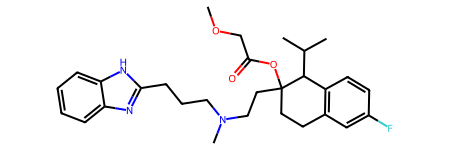

In [ ]:
# Mol from a smiles
mol = dm.to_mol("CC(C)C1C2=C(CCC1(CCN(C)CCCC3=NC4=CC=CC=C4N3)OC(=O)COC)C=C(C=C2)F", sanitize=True)
mol

# **Common scaffold**

In [ ]:
pip install rdkit

In [ ]:
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold

In [ ]:
compound_smiles = df2["SMILES"]

In [ ]:
compound_smiles

0      C1=CC(=CC=C1COC(CN2C=CN=C2)C3=C(C=C(C=C3)Cl)Cl)Cl
1      C1=CC(=C(C=C1Cl)Cl)COC(CN2C=CN=C2)C3=C(C=C(C=C...
2            CCCC1COC(O1)(CN2C=NC=N2)C3=C(C=C(C=C3)Cl)Cl
13     CC(=O)N1CCN(CC1)C2=CC=C(C=C2)OCC3COC(O3)(CN4C=...
14     CC1=C(C(C(=C(N1)C)C(=O)OCCN(C)CC2=CC=CC=C2)C3=...
15     CC(C)C1C2=C(CCC1(CCN(C)CCCC3=NC4=CC=CC=C4N3)OC...
23     CC1=C(C(C(=C(N1)C)C(=O)OCCN(C)CC2=CC=CC=C2)C3=...
24     CC(=O)N1CCN(CC1)C2=CC=C(C=C2)OCC3COC(O3)(CN4C=...
25     CC(C)C1C2=C(CCC1(CCN(C)CCCC3=NC4=CC=CC=C4N3)OC...
33     CN(C)C(=O)C(CCN1CCC(CC1)(C2=CC=C(C=C2)Cl)O)(C3...
160                          C1=CC=C2C=C3C=CC=CC3=CC2=C1
161                 C1=CC2=C3C(=C1)C=CC4=CC=CC(=C43)C=C2
162              C#CC1=CC2=C3C(=C1)C=CC4=C3C(=CC=C4)C=C2
163                         CC#CC1=CC=C(C=C1)C2=CC=CC=C2
164               CC#CC1=CC2=CC=CC3=C2C4=C(C=CC=C14)C=C3
199             CNCCC(C1=CC=CC=C1)OC2=CC=C(C=C2)C(F)(F)F
256                 CCCCCN=C(N)NN=CC1=CNC2=C1C=C(C=C2)OC
264    CC(=O)N1CCN(CC1)C2=CC=C(

In [ ]:
compounds = [Chem.MolFromSmiles(smiles) for smiles in compound_smiles]

In [ ]:
scaffolds = [MurckoScaffold.GetScaffoldForMol(compound) for compound in compounds]

In [ ]:
scaffolds

In [ ]:
from rdkit.Chem import Draw

# Assuming 'scaffolds' is a list of RDKit molecules
scaffold_images = []

for scaffold in scaffolds:
    img = Draw.MolToImage(scaffold)
    scaffold_images.append(img)

# Now, you have a list of images for each scaffold
# You can display them or save them as needed


In [ ]:
img

In [ ]:
scaffold_img = Chem.Draw.MolToImage(scaffolds)
scaffold_img.show()

In [ ]:
scaffold_smiles = Chem.MolToSmiles(scaffolds)

In [ ]:
print("Common Scaffold SMILES:", scaffold_smiles)

In [ ]:
# Mol from a smiles
mol = dm.to_mol(scaffold_smiles, sanitize=True)
mol

### **Multiple Common scaffold**

In [23]:
pip install rdkit

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [24]:
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold

In [25]:
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold

In [26]:
compound_smiles = df["SMILES"]

In [ ]:
compound_smiles

In [28]:
compounds = [Chem.MolFromSmiles(smiles) for smiles in compound_smiles]

In [32]:
Scaffolds = [MurckoScaffold.GetScaffoldForMol(compound) for compound in compounds]

In [34]:
scaffold_img = Chem.Draw.MolToImage(Scaffolds)
scaffold_img.show()

AttributeError: 'list' object has no attribute 'GetAtomWithIdx'

In [38]:
scaffold_smiles = Chem.MolToSmiles(Scaffolds)

ArgumentError: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(list)
did not match C++ signature:
    MolToSmiles(class RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(class RDKit::ROMol mol, struct RDKit::SmilesWriteParams params)

In [36]:
print("Common Scaffold SMILES:", scaffold_smiles)

NameError: name 'scaffold_smiles' is not defined

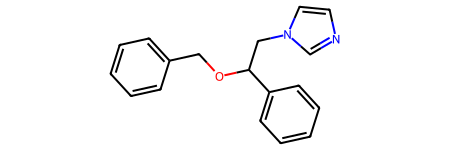

In [ ]:
# Mol from a smiles
mol = dm.to_mol(scaffold_smiles, sanitize=True)
mol

In [ ]:
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
from itertools import combinations

# Assuming you have a list of SMILES in 'compound_smiles'
compound_smiles = df2["SMILES"]
compounds = [Chem.MolFromSmiles(smiles) for smiles in compound_smiles]

# List to store the unique scaffolds
unique_scaffolds = set()

# Iterate through all combinations of compounds
for combo in combinations(compounds, 2):  # Change the number 2 to the desired combination size
    scaffold = MurckoScaffold.GetScaffoldForMol(combo[0])
    scaffold_smiles = Chem.MolToSmiles(scaffold)
    unique_scaffolds.add(scaffold_smiles)

# Print all unique scaffolds
for idx, scaffold_smiles in enumerate(unique_scaffolds, 1):
    print(f"Scaffold {idx} SMILES:", scaffold_smiles)


Scaffold 1 SMILES: 
Scaffold 2 SMILES: c1ccc2cc3c(ccc4ccccc43)cc2c1
Scaffold 3 SMILES: O=C(NCC1CCCCN1)c1ccccc1
Scaffold 4 SMILES: c1ccccc1
Scaffold 5 SMILES: c1ccc(C2(Cn3cncn3)OCCO2)cc1
Scaffold 6 SMILES: c1ccc(COC(Cn2ccnc2)c2ccccc2)cc1
Scaffold 7 SMILES: O=C(CCCN1CCC(c2ccccc2)CC1)c1ccccc1
Scaffold 8 SMILES: c1ccc(COc2ccccc2)cc1
Scaffold 9 SMILES: c1ccc(C2CCNCC2COc2ccc3c(c2)OCO3)cc1
Scaffold 10 SMILES: O=C(CC1CCCC(CCc2ccccc2)N1)c1ccccc1
Scaffold 11 SMILES: O=C(CNC(=O)NCc1cscn1)NC(CCC(Cc1ccccc1)NC(=O)OCc1cncs1)Cc1ccccc1
Scaffold 12 SMILES: O=C(NC(CCN1CCC2CCCCC2C1)CSc1ccccc1)c1ccccc1
Scaffold 13 SMILES: c1ccc2c3c([nH]c2c1)C1CC2CCC1N(CC3)C2
Scaffold 14 SMILES: c1ccc2c(c1)CCC(CCNCCCc1nc3ccccc3[nH]1)C2
Scaffold 15 SMILES: c1ccc2cc3ccccc3cc2c1
Scaffold 16 SMILES: O=c1n(CCOc2ccccc2)cnn1CCCN1CCN(c2ccccc2)CC1
Scaffold 17 SMILES: c1ccc(C2(Cn3ccnc3)OCC(COc3ccc(N4CCNCC4)cc3)O2)cc1
Scaffold 18 SMILES: O=C(CCc1ccccc1)c1ccccc1
Scaffold 19 SMILES: c1ccc(-c2ccccc2)cc1
Scaffold 20 SMILES: O=C(OCCNCc1ccc

In [ ]:
import pandas as pd

# Assuming 'unique_scaffolds' is a set containing scaffold SMILES

# Create a DataFrame with a column named 'Scaffold SMILES'
unique_scaffolds = pd.DataFrame({'Scaffold SMILES': list(unique_scaffolds)})

# Print or use the DataFrame as needed
print(unique_scaffolds)


                                      Scaffold SMILES
0                                                    
1                        c1ccc2cc3c(ccc4ccccc43)cc2c1
2                             O=C(NCC1CCCCN1)c1ccccc1
3                                            c1ccccc1
4                         c1ccc(C2(Cn3cncn3)OCCO2)cc1
5                     c1ccc(COC(Cn2ccnc2)c2ccccc2)cc1
6                  O=C(CCCN1CCC(c2ccccc2)CC1)c1ccccc1
7                                c1ccc(COc2ccccc2)cc1
8                 c1ccc(C2CCNCC2COc2ccc3c(c2)OCO3)cc1
9                  O=C(CC1CCCC(CCc2ccccc2)N1)c1ccccc1
10  O=C(CNC(=O)NCc1cscn1)NC(CCC(Cc1ccccc1)NC(=O)OC...
11        O=C(NC(CCN1CCC2CCCCC2C1)CSc1ccccc1)c1ccccc1
12               c1ccc2c3c([nH]c2c1)C1CC2CCC1N(CC3)C2
13           c1ccc2c(c1)CCC(CCNCCCc1nc3ccccc3[nH]1)C2
14                               c1ccc2cc3ccccc3cc2c1
15        O=c1n(CCOc2ccccc2)cnn1CCCN1CCN(c2ccccc2)CC1
16  c1ccc(C2(Cn3ccnc3)OCC(COc3ccc(N4CCNCC4)cc3)O2)cc1
17                          

In [ ]:
unique_scaffolds=pd.read_csv('/content/drive/MyDrive/Paper2/unique_scaffolds.csv')

# Finding Common Scaffold for Unique Scaffolds

In [ ]:
compound_smiles = unique_scaffolds['Scaffold_SMILES']

In [ ]:
compounds = [Chem.MolFromSmiles(smiles) for smiles in compound_smiles]

In [ ]:
scaffolds = [MurckoScaffold.GetScaffoldForMol(compound) for compound in compounds]

In [ ]:
scaffold_img = Chem.Draw.MolToImage(scaffold)
scaffold_img.show()

In [ ]:
scaffold_smiles2 = Chem.MolToSmiles(scaffold)

In [ ]:
print("Common Scaffold SMILES:", scaffold_smiles2)

Common Scaffold SMILES: O=C(CCCN1CCC(c2ccccc2)CC1)c1ccccc1


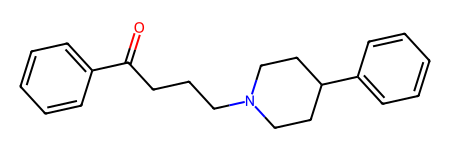

In [ ]:
# Mol from a smiles
mol = dm.to_mol(scaffold_smiles2, sanitize=True)
mol

Finding Tanimoto Similarty between

In [ ]:
scaffold_smiles2

'O=C(CCCN1CCC(c2ccccc2)CC1)c1ccccc1'

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs

# Define the reference SMILES
smiles2 = "O=C(CCCN1CCC(c2ccccc2)CC1)c1ccccc1"

# Create a list to store the similarity scores
similarities = []

# Iterate through the SMILES in df1
for smiles1 in df1["SMILES"]:
    # Convert the SMILES strings to RDKit molecules
    mol1 = Chem.MolFromSmiles(smiles1)
    mol2 = Chem.MolFromSmiles(smiles2)

    if mol1 is not None and mol2 is not None:
        # Calculate Morgan fingerprints for the molecules
        radius = 2  # Adjust the radius as needed
        fp1 = AllChem.GetMorganFingerprint(mol1, radius)
        fp2 = AllChem.GetMorganFingerprint(mol2, radius)

        # Calculate the Tanimoto similarity
        similarity = DataStructs.TanimotoSimilarity(fp1, fp2)
        similarities.append(similarity)
    else:
        # Handle cases where the SMILES couldn't be converted to molecules
        similarities.append(None)

# Add the similarity scores as a new column in df1
df1["Tanimoto Similarity"] = similarities


In [ ]:
sorted_df = df1.sort_values(by="Tanimoto Similarity", ascending=False)

In [ ]:
sorted_df['Tanimoto Similarity'].describe

# Clusters in Aglomerate

In [ ]:
a=pd.read_csv('/content/drive/MyDrive/Paper2/cluster_4_df.csv')
a.sample(2)

,Observation\nnumber,CYP subtype,Compound name,pIC50,SMILES,Molecular_Formula,Atom_Types,Bond_Types,Ring_Info,Isotopes,Aromatic_Atoms,Chirality_Info,Overall_Charge,Implicit_Hydrogens,Functional_Groups,Num_Rings,Largest_Ring_Size,Smallest_Ring_Size,LogP,pKa,MolWt,ExactMolWt,HeavyAtomCount,HeavyAtomMolWt,NHOHCount,NOCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,NumAromaticHeterocycles,NumSaturatedHeterocycles,NumAliphaticHeterocycles,RingCount,FractionCSP3,TPSA,Veber_Passes,Ghose_Passes,Muegge_Passes,Ro3_Passes,Egan_Passes,Ro2_Passes,Lipinski_Passes,K_meansCluster,HDBSCAN_Cluster,Agglomerative_Cluster
0,14,CYP3A5,ketoconazole,7.00,CC(=O)N1CCN(CC1)C2=CC=C(C=C2)OCC3COC(O3)(CN4C=...,C26H28Cl2N4O4,"['C', 'C', 'O', 'N', 'C', 'C', 'N', 'C', 'C', ...","[1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",<rdkit.Chem.rdchem.RingInfo object at 0x7ab85b...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",[],0,"[3, 0, 0, 0, 2, 2, 0, 2, 2, 0, 1, 1, 0, 1, 1, ...",CC(=O)N1CCN(c2ccc(OCC3COC(Cn4ccnc4)(c4ccc(Cl)c...,5,6,5,4.2058,137.5960,531.440,530.148761,36,503.216,0,8,7,0,10,8,190,3,2,2,1,2,2,5,0.384615,69.06,1,0,0,0,0,0,0,2,-1,4
1,15,CYP3A5,nicardipine,6.85,CC1=C(C(C(=C(N1)C)C(=O)OCCN(C)CC2=CC=CC=C2)C3=...,C26H29N3O6,"['C', 'C', 'C', 'C', 'C', 'C', 'N', 'C', 'C', ...","[1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, ...",<rdkit.Chem.rdchem.RingInfo object at 0x7ab85b...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",[],0,"[3, 0, 0, 1, 0, 0, 1, 3, 0, 0, 0, 2, 2, 0, 3, ...",COC(=O)C1=C(C)NC(C)=C(C(=O)OCCN(C)Cc2ccccc2)C1...,3,6,6,3.6778,130.1241,479.533,479.205636,35,450.301,1,9,8,1,9,13,184,2,0,1,0,0,1,3,0.307692,111.01,1,1,0,0,1,0,1,2,-1,4
2,206,CYP1A2,pyrene,6.92,C1=CC2=C3C(=C1)C=CC4=CC=CC(=C43)C=C2,C16H10,"['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', ...","[1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, ...",<rdkit.Chem.rdchem.RingInfo object at 0x7ab85b...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[True, True, True, True, True, True, True, Tru...",[],0,"[1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1]",c1cc2ccc3cccc4ccc(c1)c2c34,4,6,6,4.5840,70.1460,202.256,202.078250,16,192.176,0,0,0,0,0,0,74,4,0,0,0,0,0,4,0.000000,0.00,1,1,0,0,1,0,1,2,-1,4
3,207,CYP1A2,2-ethynylpyrene,7.22,C#CC1=CC2=C3C(=C1)C=CC4=C3C(=CC=C4)C=C2,C18H10,"['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', ...","[3.0, 1.0, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, ...",<rdkit.Chem.rdchem.RingInfo object at 0x7ab85b...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, True, True, True, True, True, T...",[],0,"[1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, ...",C#Cc1cc2ccc3cccc4ccc(c1)c2c34,4,6,6,4.5653,78.0810,226.278,226.078250,18,216.198,0,0,0,0,0,0,82,4,0,0,0,0,0,4,0.000000,0.00,1,1,0,0,1,0,1,2,-1,4
4,208,CYP1A2,4-(1-propynyl)biphenyl,7.24,CC#CC1=CC=C(C=C1)C2=CC=CC=C2,C15H12,"['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', ...","[1.0, 3.0, 1.0, 1.5, 1.5, 1.5, 1.5, 1.5, 1.0, ...",<rdkit.Chem.rdchem.RingInfo object at 0x7ab85b...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[False, False, False, True, True, True, True, ...",[],0,"[3, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1]",CC#Cc1ccc(-c2ccccc2)cc1,2,6,6,3.7250,64.4300,192.261,192.093900,15,180.165,0,0,0,0,0,1,72,2,0,0,0,0,0,2,0.066667,0.00,1,1,0,0,1,0,1,2,-1,4
5,209,CYP1A2,4-(1-propynyl)pyrene,7.30,CC#CC1=CC2=CC=CC3=C2C4=C(C=CC=C14)C=C3,C19H12,"['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', ...","[1.0, 3.0, 1.0, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, ...",<rdkit.Chem.rdchem.RingInfo object at 0x7ab85b...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, True, True, True, True, ...",[],0,"[3, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, ...",CC#Cc1cc2cccc3ccc4cccc1c4c32,4,6,6,4.9554,82.6980,240.305,240.093900,19,228.209,0,0,0,0,0,0,88,4,0,0,0,0,0,4,0.052632,0.00,1,1,0,0,1,0,1,2,-1,4
6,320,CYP3A4,keto

In [ ]:
cluster4=pd.read_csv('/content/drive/MyDrive/Paper2/cluster_4_df.csv')
cluster3=pd.read_csv('/content/drive/MyDrive/Paper2/cluster_3_df.csv')
cluster2=pd.read_csv('/content/drive/MyDrive/Paper2/cluster_2_df.csv')
cluster1=pd.read_csv('/content/drive/MyDrive/Paper2/cluster_1_df.csv')
cluster0=pd.read_csv('/content/drive/MyDrive/Paper2/cluster_0_df.csv')

In [ ]:
df_cl4=cluster4
df_cl3=cluster3
df_cl2=cluster2
df_cl1=cluster1
df_cl0=cluster0

# Maximum Common Substructure of Cluster_4

In [ ]:
from rdkit import Chem
from rdkit.Chem import rdFMCS

# Extract the SMILES from the DataFrame
smiles_list = df_cl4['SMILES'].tolist()

# Convert SMILES to RDKit molecules
mol_list = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

# Calculate the MCS
mcs = rdFMCS.FindMCS(mol_list)

# Create the MCS molecule using the SMARTS representation
mcs_smarts = mcs.smartsString

# Print or use the MCS SMARTS representation
print("MCS SMARTS:", mcs_smarts)


MCS SMARTS: [#6]1:[#6]:[#6]:[#6](:[#6]:[#6]:1)-,:[#6]:,-[#6]


In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw

# Create an RDKit molecule from the MCS SMARTS representation
mcs_molecule = Chem.MolFromSmarts(mcs_smarts)

# To display the MCS molecule as an image
img = Draw.MolToImage(mcs_molecule, size=(300, 300))


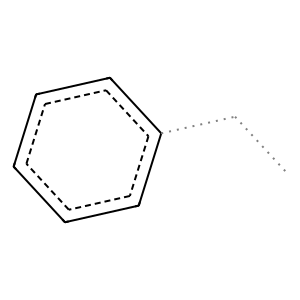

In [ ]:
img

# Analysing Cluster

In [ ]:
# Display or analyze the MCS for each cluster
for i, mcs in enumerate(cluster_mcs):
    print(f"Cluster {i+1} MCS SMARTS:", mcs.smartsString)

    # Extract the SMILES from the MCS and print it
    mcs_molecule = Chem.MolFromSmarts(mcs.smartsString)
    mcs_smiles = Chem.MolToSmiles(mcs_molecule)
    print(f"Cluster {i+1} MCS SMILES:", mcs_smiles)

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw

# Define the SMILES string enclosed in quotation marks
smiles = "C:CC1:C:C:C:C:C:1"

# Create an RDKit molecule from the SMILES
mol = Chem.MolFromSmiles(smiles)

# Check if the molecule was created successfully
if mol:
    # Generate a 2D depiction of the molecule
    Chem.Kekulize(mol)
    Chem.SanitizeMol(mol)

    # Display the molecule
    img = Draw.MolToImage(mol, size=(200, 200))
    img.show()
else:
    print("Failed to create a molecule.")


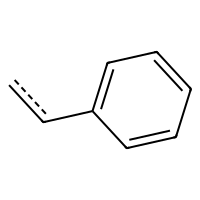

In [ ]:
img

In [ ]:
df_cl2=df['']

In [ ]:
df_cl2=cluster2
df_cl1=cluster1
df_cl0=cluster0

Scaffolds numbers in cluster 4

In [ ]:
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold

# Convert SMILES to RDKit molecules
df_cl4['Molecule'] = df_cl4['SMILES'].apply(Chem.MolFromSmiles)

# Remove salts and counterions (if needed)
# Example: df['Molecule'] = df['Molecule'].apply(some_function_to_remove_salts)

# Generate scaffolds and store them in a new column 'Scaffold'
df_cl4['Scaffold'] = df_cl4['Molecule'].apply(lambda mol: Chem.MolToSmiles(MurckoScaffold.GetScaffoldForMol(mol)))

# Count the occurrence of each scaffold
scaffold_counts4 = df_cl4['Scaffold'].value_counts()

# Display the most common scaffolds and their occurrence
print(scaffold_counts4)


In [ ]:
df_cl4.to_csv('/content/drive/MyDrive/Paper2/cluster_4_df.csv',index=False)

In [ ]:
df_cl4.sample(2)

,Observation\nnumber,CYP subtype,Compound name,pIC50,SMILES,Molecular_Formula,Atom_Types,Bond_Types,Ring_Info,Isotopes,Aromatic_Atoms,Chirality_Info,Overall_Charge,Implicit_Hydrogens,Functional_Groups,Num_Rings,Largest_Ring_Size,Smallest_Ring_Size,LogP,pKa,MolWt,ExactMolWt,HeavyAtomCount,HeavyAtomMolWt,NHOHCount,NOCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,NumAromaticHeterocycles,NumSaturatedHeterocycles,NumAliphaticHeterocycles,RingCount,FractionCSP3,TPSA,Veber_Passes,Ghose_Passes,Muegge_Passes,Ro3_Passes,Egan_Passes,Ro2_Passes,Lipinski_Passes,K_meansCluster,HDBSCAN_Cluster,Agglomerative_Cluster,Molecule,Scaffold
18,542,CYP1B1,2-ethynylpyrene,7.52,C#CC1=CC2=C3C(=C1)C=CC4=C3C(=CC=C4)C=C2,C18H10,"['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', ...","[3.0, 1.0, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, ...",<rdkit.Chem.rdchem.RingInfo object at 0x7ab85b...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, True, True, True, True, True, T...",[],0,"[1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, ...",C#Cc1cc2ccc3cccc4ccc(c1)c2c34,4,6,6,4.5653,78.0810,226.278,226.078250,18,216.198,0,0,0,0,0,0,82,4,0,0,0,0,0,4,0.000000,0.00,1,1,0,0,1,0,1,2,-1,4,<rdkit.Chem.rdchem.Mol object at 0x7fa1f4d3d150>,c1cc2ccc3cccc4ccc(c1)c2c34
8,463,CYP2D6,lobeline,6.92,CN1C(CCCC1CC(=O)C2=CC=CC=C2)CC(C3=CC=CC=C3)O,C22H27NO2,"['C', 'N', 'C', 'C', 'C', 'C', 'C', 'C', 'C', ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, ...",<rdkit.Chem.rdchem.RingInfo object at 0x7ab85b...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",[],0,"[3, 0, 1, 2, 2, 2, 1, 2, 0, 0, 0, 1, 1, 1, 1, ...",CN1C(CC(=O)c2ccccc2)CCCC1CC(O)c1ccccc1,3,6,6,4.2360,100.5983,337.463,337.204179,25,310.247,1,3,3,1,3,8,132,2,1,1,0,1,1,3,0.409091,40.54,1,1,0,0,1,0,1,2,-1,4,<rdkit.Chem.rdchem.Mol object at 0x7fa1f4d3ccf0>,O=C(CC1CCCC(CCc2ccccc2)N1)c1ccccc1


Working on Cluster 3

In [ ]:
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold

# Convert SMILES to RDKit molecules
df_cl3['Molecule'] = df_cl3['SMILES'].apply(Chem.MolFromSmiles)

# Remove salts and counterions (if needed)
# Example: df['Molecule'] = df['Molecule'].apply(some_function_to_remove_salts)

# Generate scaffolds and store them in a new column 'Scaffold'
df_cl3['Scaffold'] = df_cl3['Molecule'].apply(lambda mol: Chem.MolToSmiles(MurckoScaffold.GetScaffoldForMol(mol)))

# Count the occurrence of each scaffold
scaffold_counts3= df_cl3['Scaffold'].value_counts()

# Display the most common scaffolds and their occurrence
print(scaffold_counts3)


c1ccccc1                                 10
O=c1[nH]c(=O)n(Cc2ccco2)c2nc[nH]c12       5
c1ccc2c(c1)CCNC2CC1CCN2CCc3ccccc3C2C1     4
c1ccncc1                                  3
c1c[nH]cn1                                3
c1ccc(C2CC2)cc1                           3
O=c1cc(-c2ccccc2)oc2c1ccc1ccccc12         3
c1ccc(Cc2ccccc2)cc1                       3
c1ccc(Cc2ccccn2)cc1                       2
O=C1CCCCCO1                               2
O=C1CCCO1                                 2
c1cncc(C2CCCN2)c1                         1
O=C1CCC(c2cccnc2)N1                       1
c1ccc2ncccc2c1                            1
c1ccc2ccccc2c1                            1
O=S(=O)(Nc1ccnn1-c1ccccc1)c1ccccc1        1
c1ccc2c(c1)CCO2                           1
c1ccc2[nH]nnc2c1                          1
O=c1cc[nH]c2cc(N3CCNCC3)ccc12             1
c1ccc(CCCCNCCc2ccccc2)cc1                 1
O=C1C=CC2C(=O)C3=Cc4ccccc4CC3CC2C1        1
c1ccc2c(c1)CCCC2                          1
S=c1[nH]cc[nH]1                 

In [ ]:
df_cl3.to_csv('/content/drive/MyDrive/Paper2/cluster_3_df.csv',index=False)

Working on Cluster 2

In [ ]:
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold

# Convert SMILES to RDKit molecules
df_cl2['Molecule'] = df_cl2['SMILES'].apply(Chem.MolFromSmiles)

# Remove salts and counterions (if needed)
# Example: df['Molecule'] = df['Molecule'].apply(some_function_to_remove_salts)

# Generate scaffolds and store them in a new column 'Scaffold'
df_cl2['Scaffold'] = df_cl2['Molecule'].apply(lambda mol: Chem.MolToSmiles(MurckoScaffold.GetScaffoldForMol(mol)))

# Count the occurrence of each scaffold
scaffold_counts2= df_cl2['Scaffold'].value_counts()

# Display the most common scaffolds and their occurrence
print(scaffold_counts2)


c1ccc2ccccc2c1                                                              21
c1ccccc1                                                                    15
O=c1cc(-c2ccccc2)oc2ccccc12                                                  6
c1ccc(CCCCN2CCC(C(c3ccccc3)c3ccccc3)CC2)cc1                                  5
c1ccc2ncccc2c1                                                               4
c1ccc(C2(Cn3ccnc3)OCC(COc3ccc(N4CCNCC4)cc3)O2)cc1                            4
O=S(Cc1ccccn1)c1nc2ccccc2[nH]1                                               4
c1ccc(COc2ccccc2)cc1                                                         4
c1ccc(CCN2CCC(Nc3nc4ccccc4n3Cc3ccccc3)CC2)cc1                                4
c1ccc2c(c1)N=C(N1CCNCC1)c1ccccc1N2                                           3
O=c1n(CCOc2ccccc2)cnn1CCCN1CCN(c2ccccc2)CC1                                  3
C=C1c2ccccc2CCc2ccccc21                                                      3
c1ccc(C2CCNCC2COc2ccc3c(c2)OCO3)cc1                 

In [ ]:
df_cl2.to_csv('/content/drive/MyDrive/Paper2/cluster_2_df.csv',index=False)

Working on Cluster 1

In [ ]:
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold

# Convert SMILES to RDKit molecules
df_cl1['Molecule'] = df_cl1['SMILES'].apply(Chem.MolFromSmiles)

# Remove salts and counterions (if needed)
# Example: df['Molecule'] = df['Molecule'].apply(some_function_to_remove_salts)

# Generate scaffolds and store them in a new column 'Scaffold'
df_cl1['Scaffold'] = df_cl1['Molecule'].apply(lambda mol: Chem.MolToSmiles(MurckoScaffold.GetScaffoldForMol(mol)))

# Count the occurrence of each scaffold
scaffold_counts1= df_cl1['Scaffold'].value_counts()

# Display the most common scaffolds and their occurrence
print(scaffold_counts1)

C1=CC(c2ccccc2)C=CN1                                            4
c1ccc(C2(Cn3ccnc3)OCC(COc3ccc(N4CCNCC4)cc3)O2)cc1               4
c1ccc(COC(Cn2ccnc2)c2ccccc2)cc1                                 3
c1ccc2c(c1)CCC(CCNCCCc1nc3ccccc3[nH]1)C2                        3
O=C(OCCNCc1ccccc1)C1=CNC=CC1c1ccccc1                            3
C=C1c2ccccc2CCc2ccccc21                                         3
c1ccc2ccccc2c1                                                  3
c1ccc2ncccc2c1                                                  3
O=C1C=CC2CCCC1C2=O                                              3
c1ccccc1                                                        3
c1ccc2c(c1)CCc1ccccc1N2                                         2
c1ccc(C2CCCc3ccccc32)cc1                                        2
c1ccc(C2CC2)cc1                                                 2
O=C(CCCN1CCC(c2ccccc2)CC1)c1ccccc1                              2
c1ccc2[nH]ccc2c1                                                2
          

In [ ]:
df_cl1.to_csv('/content/drive/MyDrive/Paper2/cluster_1_df.csv',index=False)

Working on Cluster0

In [ ]:
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold

# Convert SMILES to RDKit molecules
df_cl0['Molecule'] = df_cl0['SMILES'].apply(Chem.MolFromSmiles)

# Remove salts and counterions (if needed)
# Example: df['Molecule'] = df['Molecule'].apply(some_function_to_remove_salts)

# Generate scaffolds and store them in a new column 'Scaffold'
df_cl0['Scaffold'] = df_cl0['Molecule'].apply(lambda mol: Chem.MolToSmiles(MurckoScaffold.GetScaffoldForMol(mol)))

# Count the occurrence of each scaffold
scaffold_counts0= df_cl0['Scaffold'].value_counts()

# Display the most common scaffolds and their occurrence
print(scaffold_counts0)

c1ccccc1                                                                            15
c1ccc2ccccc2c1                                                                      12
c1c[nH]cn1                                                                          10
c1ccc2c(CC3CC4CCN3CC4)ccnc2c1                                                        9
O=S(=O)(Nc1ccnn1-c1ccccc1)c1ccccc1                                                   8
O=c1cc(-c2ccccc2)oc2ccccc12                                                          8
O=c1c(CCN2CCC(c3noc4ccccc34)CC2)cnc2n1CCCC2                                          8
c1ccc(C2CC2)cc1                                                                      7
c1ccncc1                                                                             7
c1ccc(Cc2ccccc2)cc1                                                                  6
c1ccc2[nH]ccc2c1                                                                     6
c1ccc(C(Cn2cncn2)Cn2cncn2)cc1              

In [ ]:
df_cl0.to_csv('/content/drive/MyDrive/Paper2/cluster_0_df.csv',index=False)

In [ ]:
df_cl0.head(10)

Searching Substructure

trying to find if certain substructure is found

In [ ]:
from rdkit import Chem
import pandas as pd

# Load the substructure SMILES into an RDKit molecule
substructure_smiles = 'C:CC1:C:C:C:C:C:1'
substructure_molecule = Chem.MolFromSmiles(substructure_smiles)

# Create a list to store the compounds and their names containing the substructure
compounds_with_substructure = []

# Iterate through the compounds in your new list (assuming it's in a DataFrame df5)
for index, row in df.iterrows():
    smiles = row['SMILES']
    molecule = Chem.MolFromSmiles(smiles)

    # Check if the compound contains the substructure
    if molecule and molecule.HasSubstructMatch(substructure_molecule):
        compound_name = row['Compound name']
        compounds_with_substructure.append((compound_name, smiles))

# compounds_with_substructure now contains tuples of (CompoundName, SMILES) for compounds with the substructure
for name, smiles in compounds_with_substructure:
    print(f'Compound Name: {name}, SMILES: {smiles}')


Compound Name: biphenyl, SMILES: C1=CC=C(C=C1)C2=CC=CC=C2
Compound Name: biphenyl, SMILES: C1=CC=C(C=C1)C2=CC=CC=C2
Compound Name: quercetin, SMILES: C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O
Compound Name: flurbiprofen, SMILES: CC(C1=CC(=C(C=C1)C2=CC=CC=C2)F)C(=O)O
Compound Name: dantrolene, SMILES: C1C(=O)NC(=O)N1N=CC2=CC=C(O2)C3=CC=C(C=C3)[N+](=O)[O-]
Compound Name: 4-(1-propynyl)biphenyl, SMILES: CC#CC1=CC=C(C=C1)C2=CC=CC=C2
Compound Name: morin, SMILES: C1=CC(=C(C=C1O)O)C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O
Compound Name: luteolin, SMILES: C1=CC(=C(C=C1C2=CC(=O)C3=C(C=C(C=C3O2)O)O)O)O
Compound Name: kaempferol, SMILES: C1=CC(=CC=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O
Compound Name: myricetin, SMILES: C1=C(C=C(C(=C1O)O)O)C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O
Compound Name: fisetin, SMILES: C1=CC(=C(C=C1C2=C(C(=O)C3=C(O2)C=C(C=C3)O)O)O)O
Compound Name: avicularin, SMILES: C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)OC4C(C(C(O4)CO)O)O)O)O
Compound Name: quercetin, SMILES: C1=CC(=C(C=C1C2=C(C(

['CN1C(CCCC1CC(=O)C2=CC=CC=C2)CC(C3=CC=CC=C3)O']

In [ ]:
# Create a new DataFrame from the list of compounds with the substructure
df_compounds_with_substructure = pd.DataFrame(compounds_with_substructure, columns=['Compound Name', 'SMILES'])

# Save the new DataFrame to a CSV file
df_compounds_with_substructure.to_csv('/content/drive/MyDrive/Paper2/compounds_with_MCS.csv', index=False)


In [ ]:
from rdkit import Chem
import pandas as pd

# Load the substructure SMILES into an RDKit molecule
substructure_smiles = 'C:CC1:C:C:C:C:C:1'
substructure_molecule = Chem.MolFromSmiles(substructure_smiles)

# Create a list to store the compounds and their names containing the substructure
compounds_with_substructure = []

# Iterate through the compounds in your new list (assuming it's in a DataFrame df5)
for index, row in df.iterrows():
    smiles = row['SMILES']
    molecule = Chem.MolFromSmiles(smiles)

    # Check if the compound contains the substructure
    if molecule and molecule.HasSubstructMatch(substructure_molecule):
        compound_name = row['Compound name']
        pIC50 = row['pIC50']
        compounds_with_substructure.append((compound_name, smiles, pIC50))

# Create a new DataFrame with the compounds containing the substructure
columns = ['Compound Name', 'SMILES', 'pIC50']
new_df = pd.DataFrame(compounds_with_substructure, columns=columns)

# Save the new DataFrame to a CSV file
new_df.to_csv('/content/drive/MyDrive/Paper2/compounds_with_MCS.csv', index=False)



In [ ]:
new_df

In [ ]:
df_compounds_with_substructure

combining 4 cluster_df's

In [ ]:
cluster4=pd.read_csv('/content/drive/MyDrive/Paper2/cluster_4_df.csv')
cluster3=pd.read_csv('/content/drive/MyDrive/Paper2/cluster_3_df.csv')
cluster2=pd.read_csv('/content/drive/MyDrive/Paper2/cluster_2_df.csv')
cluster1=pd.read_csv('/content/drive/MyDrive/Paper2/cluster_1_df.csv')
cluster0=pd.read_csv('/content/drive/MyDrive/Paper2/cluster_0_df.csv')

In [ ]:
import pandas as pd

# Assuming you have four DataFrames named df1, df2, df3, and df4
cluster_ALL = [cluster0, cluster1, cluster2, cluster3,cluster4]

# Concatenate the DataFrames along the rows
combined_cluster = pd.concat(cluster_ALL, ignore_index=True)

# The resulting combined_df will contain all rows from df1, df2, df3, and df4


In [ ]:
combined_cluster.shape

(595, 52)

In [ ]:
combined_cluster.to_csv('/content/drive/MyDrive/Paper2/combined_cluster.csv',index=False)

In [ ]:
combined_cluster.sample(2)

,Observation\nnumber,CYP subtype,Compound name,pIC50,SMILES,Molecular_Formula,Atom_Types,Bond_Types,Ring_Info,Isotopes,Aromatic_Atoms,Chirality_Info,Overall_Charge,Implicit_Hydrogens,Functional_Groups,Num_Rings,Largest_Ring_Size,Smallest_Ring_Size,LogP,pKa,MolWt,ExactMolWt,HeavyAtomCount,HeavyAtomMolWt,NHOHCount,NOCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,NumAromaticHeterocycles,NumSaturatedHeterocycles,NumAliphaticHeterocycles,RingCount,FractionCSP3,TPSA,Veber_Passes,Ghose_Passes,Muegge_Passes,Ro3_Passes,Egan_Passes,Ro2_Passes,Lipinski_Passes,K_meansCluster,HDBSCAN_Cluster,Agglomerative_Cluster,Molecule,Scaffold
288,248,CYP2D6,alprenolol,5.66,CC(C)NCC(COC1=CC=CC=C1CC=C)O,C15H23NO2,"['C', 'C', 'C', 'N', 'C', 'C', 'C', 'O', 'C', ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.5, ...",<rdkit.Chem.rdchem.RingInfo object at 0x7ab85b...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",[],0,"[3, 1, 3, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 2, ...",C=CCc1ccccc1OCC(O)CNC(C)C,1,6,6,2.1528,74.9835,249.354,249.172879,18,226.170,2,3,3,2,3,11,100,1,0,0,0,0,0,1,0.466667,41.49,1,1,0,1,1,0,1,0,2,1,<rdkit.Chem.rdchem.Mol object at 0x7fa1f4f17760>,c1ccccc1
148,477,CYP3A4,metoclopramide,3.97,CCN(CC)CCNC(=O)C1=CC(=C(C=C1OC)N)Cl,C14H22ClN3O2,"['C', 'C', 'N', 'C', 'C', 'C', 'C', 'N', 'C', ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, ...",<rdkit.Chem.rdchem.RingInfo object at 0x7ab85b...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",[],0,"[3, 2, 0, 2, 3, 2, 2, 1, 0, 0, 0, 1, 0, 0, 1, ...",CCN(CC)CCNC(=O)c1cc(Cl)c(N)cc1OC,1,6,6,2.0024,82.5376,299.802,299.140055,20,277.626,3,5,4,2,6,11,112,1,0,0,0,0,0,1,0.500000,67.59,1,1,1,0,1,0,1,1,17,0,<rdkit.Chem.rdchem.Mol object at 0x7fa1f4f351c0>,c1ccccc1


## calculating Molecule/ SMILES of df

In [ ]:
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold

# Assuming your DataFrame is named 'df' and it has a 'SMILES' column

# Create 'Molecule' column by applying Chem.MolFromSmiles to 'SMILES'
df['Molecule'] = df['SMILES'].apply(Chem.MolFromSmiles)

# Create 'Scaffold' column by applying MurckoScaffold.GetScaffoldForMol to 'Molecule'
df['Scaffold'] = df['Molecule'].apply(lambda mol: Chem.MolToSmiles(MurckoScaffold.GetScaffoldForMol(mol)))


In [ ]:
df.sample(10)

In [ ]:
combined_cluster.columns

Index(['Observation\nnumber', 'CYP subtype', 'Compound name', 'pIC50',
       'SMILES', 'Molecular_Formula', 'Atom_Types', 'Bond_Types', 'Ring_Info',
       'Isotopes', 'Aromatic_Atoms', 'Chirality_Info', 'Overall_Charge',
       'Implicit_Hydrogens', 'Functional_Groups', 'Num_Rings',
       'Largest_Ring_Size', 'Smallest_Ring_Size', 'LogP', 'pKa', 'MolWt',
       'ExactMolWt', 'HeavyAtomCount', 'HeavyAtomMolWt', 'NHOHCount',
       'NOCount', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms',
       'NumRotatableBonds', 'NumValenceElectrons', 'NumAromaticRings',
       'NumSaturatedRings', 'NumAliphaticRings', 'NumAromaticHeterocycles',
       'NumSaturatedHeterocycles', 'NumAliphaticHeterocycles', 'RingCount',
       'FractionCSP3', 'TPSA', 'Veber_Passes', 'Ghose_Passes', 'Muegge_Passes',
       'Ro3_Passes', 'Egan_Passes', 'Ro2_Passes', 'Lipinski_Passes',
       'K_meansCluster', 'HDBSCAN_Cluster', 'Agglomerative_Cluster',
       'Molecule', 'Scaffold'],
      dtype='object')

In [ ]:
df.columns

Index(['Observation\nnumber', 'CYP subtype', 'Compound name', 'pIC50',
       'SMILES', 'Molecular_Formula', 'Atom_Types', 'Bond_Types', 'Ring_Info',
       'Isotopes', 'Aromatic_Atoms', 'Chirality_Info', 'Overall_Charge',
       'Implicit_Hydrogens', 'Functional_Groups', 'Num_Rings',
       'Largest_Ring_Size', 'Smallest_Ring_Size', 'LogP', 'pKa', 'MolWt',
       'ExactMolWt', 'HeavyAtomCount', 'HeavyAtomMolWt', 'NHOHCount',
       'NOCount', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms',
       'NumRotatableBonds', 'NumValenceElectrons', 'NumAromaticRings',
       'NumSaturatedRings', 'NumAliphaticRings', 'NumAromaticHeterocycles',
       'NumSaturatedHeterocycles', 'NumAliphaticHeterocycles', 'RingCount',
       'FractionCSP3', 'TPSA', 'Veber_Passes', 'Ghose_Passes', 'Muegge_Passes',
       'Ro3_Passes', 'Egan_Passes', 'Ro2_Passes', 'Lipinski_Passes',
       'Molecule', 'Scaffold'],
      dtype='object')

In [ ]:
select=[['CYP subtype', 'Compound name', 'pIC50',
       'SMILES','Largest_Ring_Size', 'Smallest_Ring_Size', 'LogP', 'pKa', 'MolWt',
       'HeavyAtomCount', 'HeavyAtomMolWt', 'NHOHCount',
       'NOCount', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms',
       'NumRotatableBonds', 'NumValenceElectrons', 'NumAromaticRings',
       'NumSaturatedRings', 'NumAliphaticRings', 'NumAromaticHeterocycles',
       'NumSaturatedHeterocycles', 'NumAliphaticHeterocycles', 'RingCount',
       'FractionCSP3', 'TPSA', 'Veber_Passes', 'Ghose_Passes', 'Muegge_Passes',
       'Ro3_Passes', 'Egan_Passes', 'Ro2_Passes', 'Lipinski_Passes',
       'Molecule', 'Scaffold']]

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem

# Load your DataFrame with a 'SMILES' column
df = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Paper2/combined_cluster.csv'))
df = df.dropna(subset=['Scaffold'])
# Define a function to calculate descriptors
def calculate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return [None] * 20  # Return a list of None values for all descriptors if SMILES is invalid

    # Calculate Gasteiger charges using the MoleculeKit library
    mol = Chem.AddHs(mol)  # Add hydrogens to the molecule for charge calculation
    AllChem.ComputeGasteigerCharges(mol)

    descriptors = {
        'MolLogP_skf': Descriptors.MolLogP(mol),
        'MolWt_skf': Descriptors.MolWt(mol),
        'HeavyAtomCount_skf': Descriptors.HeavyAtomCount(mol),
        'HeavyAtomMolWt_skf': Descriptors.HeavyAtomMolWt(mol),
        'NHOHCount_skf': Descriptors.NHOHCount(mol),
        'NumHAcceptors_skf': Descriptors.NumHAcceptors(mol),
        'NumHDonors_skf': Descriptors.NumHDonors(mol),
        'NumHeteroatoms_skf': Descriptors.NumHeteroatoms(mol),
        'NumRotatableBonds_skf': Descriptors.NumRotatableBonds(mol),
        'NumValenceElectrons_skf': Descriptors.NumValenceElectrons(mol),
        'NumAromaticRings_skf': Descriptors.NumAromaticRings(mol),
        'NumSaturatedRings_skf': Descriptors.NumSaturatedRings(mol),
        'NumAliphaticRings_skf': Descriptors.NumAliphaticRings(mol),
        'NumAromaticHeterocycles_skf': Descriptors.NumAromaticHeterocycles(mol),
        'NumSaturatedHeterocycles_skf': Descriptors.NumSaturatedHeterocycles(mol),
        'NumAliphaticHeterocycles_skf': Descriptors.NumAliphaticHeterocycles(mol),
        'RingCount_skf': Descriptors.RingCount(mol),
        'FractionCSP3_skf': Descriptors.FractionCSP3(mol),
        'TPSA_skf': Descriptors.TPSA(mol),
        'pKa_skf': Descriptors.MolMR(mol)



    }

    return pd.Series(descriptors)


In [ ]:

# Apply the function to the 'Scaffold' column and create new columns
new_descriptors = df['Scaffold'].apply(calculate_descriptors)

# Add the new columns to the DataFrame
df_skf = pd.concat([df, new_descriptors.apply(pd.Series)], axis=1)

In [43]:
canc=pd.read_csv("drugALLomics_merge.csv")
skf=pd.read_csv("Pancr_Cell.csv")

In [ ]:
canc['scaffold']

In [60]:
merged_df = pd.merge(canc, skf, on='DRUG_NAME', how='left')

In [61]:
merged_df.head(10)

,CELL_LINE_x,DRUG_NAME,PUTATIVE_TARGET_x,PATHWAY_NAME_x,LN_IC50_x,SMILES_x,MolLogP_x,MolWt_x,HeavyAtomCount_x,HeavyAtomMolWt_x,NHOHCount_x,NOCount_x,NumHAcceptors_x,NumHDonors_x,NumHeteroatoms_x,NumRotatableBonds_x,NumValenceElectrons_x,NumAromaticRings_x,NumSaturatedRings_x,NumAliphaticRings_x,NumAromaticHeterocycles_x,NumSaturatedHeterocycles_x,NumAliphaticHeterocycles_x,RingCount_x,FractionCSP3_x,TPSA_x,Largest_Ring_Size_x,Smallest_Ring_Size_x,pKa_x,Veber_Passes_x,Ghose_Passes_x,Muegge_Passes_x,Ro3_Passes_x,Egan_Passes_x,Ro2_Passes_x,Lipinski_Passes_x,MolLogP_skf_x,MolWt_skf_x,HeavyAtomCount_skf_x,HeavyAtomMolWt_skf_x,NHOHCount_skf_x,NumHAcceptors_skf_x,NumHDonors_skf_x,NumHeteroatoms_skf_x,NumRotatableBonds_skf_x,NumValenceElectrons_skf_x,NumAromaticRings_skf_x,NumSaturatedRings_skf_x,NumAliphaticRings_skf_x,NumAromaticHeterocycles_skf_x,NumSaturatedHeterocycles_skf_x,NumAliphaticHeterocycles_skf_x,RingCount_skf_x,FractionCSP3_skf_x,TPSA_skf_x,pKa_skf_x,cluster,Class,MSH6_Caution_x,Cyclin_E2_Caution_x,p70S6K_pT389_x,Rb_Caution_x,4E-BP1_x,Bak_Caution_x,GATA3_x,GSK3-alpha-beta_x,HER3_x,p90RSK_pT573_Caution_x,Smac_Caution_x,YB-1_pS102_x,4E-BP1_pT70_x,A-Raf_pS299_Caution_x,Bcl-2_x,c-Jun_pS73_x,c-Kit_x,c-Met_Caution_x,C-Raf(MP05-739)_x,Cyclin_B1_x,EGFR_pY1068_Caution_x,eIF4E_x,FASN_x,FRA1_Caution_x,GAPDH_Caution_x,HER2_pY1248_Caution_x,IGFBP2_x,MSH2_x,mTOR_pS2448_Caution_x,Notch1_x,p14 Arf(BetA300-340A)_Caution_x,p21_x,PI3K-p85_x,PKC-alpha_x,PKC-pan_BetaII_pS660_x,H3K9me0K14ac1_x,H3K27me2K36me1_x,H3K27me3K36me0_x,H3.3K27me0K36me0_x,H3K4me1_x,H3K4me2_x,H3K9me0K14ac0_x,H3K9me3K14ac0_x,H3K9ac1K14ac0_x,H3K9me1K14ac1_x,H3K9me2K14ac1_x,H3K9me3K14ac1_x,H3K18ac0K23ac0_x,H3K18ac1K23ac0_x,H3K18ac0K23ac1_x,H3K18ac1K23ac1_x,H3K27me0K36me2_x,H3K27me0K36me3_x,H3K27me1K36me0_x,H3K27me1K36me1_x,H3K27me1K36me2_x,H3K27me2K36me0_x,H3K27me2K36me2_x,H3K27me3K36me1_x,H3K27ac1K36me0_x,H3K27ac1K36me2_x,H3K79me0_x,H3K79me1_x,H3K79me2_x,H3K4me0_x,H3K9me2K14ac0_x,H3K9ac1K14ac1_x,H3K27me0K36me0_x,H3K27me0K36me1_x,H3K27ac1K36me1_x,dCMP_x,malonylcarnitine_x,C18:1 SM_x,C56:5 TAG_x,kynurenine_x,pipecolic acid_x,stearoylcarnitine_x,oleylcarnitine_x,C50:3 TAG_x,C54:6 TAG_x,C54:4 TAG_x,C58:8 TAG_x,hypoxanthine_x,6-phosphogluconate_x,NMMA_x,sarcosine_x,C14:0 LPC_x,C32:1 PC_x,C34:2 PC_x,C34:1 PC_x,C36:4 PC-A_x,C36:3 PC_x,C38:6 PC_x,C34:1 DAG_x,C20:5 CE_x,C52:5 TAG_x,C52:4 TAG_x,C52:2 TAG_x,C54:2 TAG_x,C56:7 TAG_x,C56:4 TAG_x,4-pyridoxate_x,alpha-ketoglutarate_x,DHAP/glyceraldehyde 3P_x,glucuronate_x,Unnamed: 0,COSMIC_ID,CELL_LINE_y,DRUG_ID,PUTATIVE_TARGET_y,PATHWAY_NAME_y,LN_IC50_y,IC50,SMILES_y,MolLogP_y,MolWt_y,HeavyAtomCount_y,HeavyAtomMolWt_y,NHOHCount_y,NOCount_y,NumHAcceptors_y,NumHDonors_y,NumHeteroatoms_y,NumRotatableBonds_y,NumValenceElectrons_y,NumAromaticRings_y,NumSaturatedRings_y,NumAliphaticRings_y,NumAromaticHeterocycles_y,NumSaturatedHeterocycles_y,NumAliphaticHeterocycles_y,RingCount_y,FractionCSP3_y,TPSA_y,Largest_Ring_Size_y,Smallest_Ring_Size_y,pKa_y,Veber_Passes_y,Ghose_Passes_y,Muegge_Passes_y,Ro3_Passes_y,Egan_Passes_y,Ro2_Passes_y,Lipinski_Passes_y,Molecule,Scaffold,MolLogP_skf_y,MolWt_skf_y,HeavyAtomCount_skf_y,HeavyAtomMolWt_skf_y,NHOHCount_skf_y,NumHAcceptors_skf_y,NumHDonors_skf_y,NumHeteroatoms_skf_y,NumRotatableBonds_skf_y,NumValenceElectrons_skf_y,NumAromaticRings_skf_y,NumSaturatedRings_skf_y,NumAliphaticRings_skf_y,NumAromaticHeterocycles_skf_y,NumSaturatedHeterocycles_skf_y,NumAliphaticHeterocycles_skf_y,RingCount_skf_y,FractionCSP3_skf_y,TPSA_skf_y,pKa_skf_y,CellLineName,CELL_LINE_NAME,BroadID,H3K4me0_y,H3K4me1_y,H3K4me2_y,H3K4ac1,H3K9me0K14ac0_y,H3K9me1K14ac0,H3K9me2K14ac0_y,H3K9me3K14ac0_y,H3K9ac1K14ac0_y,H3K9me0K14ac1_y,H3K9me1K14ac1_y,H3K9me2K14ac1_y,H3K9me3K14ac1_y,H3K9ac1K14ac1_y,H3K18ac0K23ac0_y,H3K18ac1K23ac0_y,H3K18ac0K23ac1_y,H3K18ac1K23ac1_y,H3K18ac0K23ub1,H3K27me0K36me0_y,H3K27me0K36me1_y,H3K27me0K36me2_y,H3K27me0K36me3_y,H3K27me1K36me0_y,H3K27me1K36me1_y,H3K27me1K36me2_y,H3K27me1K36me3,H3K27me2K36me0_y,H3K27me2K36me1

In [ ]:
canc['Scaffold'] = merged_df['Scaffold']

# Display the result
print(canc)

In [64]:
canc.to_csv('PanCanSkf.csv',index=False)

In [4]:
df=pd.read_csv('PanCanSkf.csv')

In [7]:
# Assuming "cluster" is the column name in your DataFrame
df_cl2 = df[df['cluster'] == 2]
df_cl1 = df[df['cluster'] == 1]
df_cl0 = df[df['cluster'] == 0]


In [8]:
# Count the occurrence of each scaffold
scaffold_counts2= df_cl2['Scaffold'].value_counts()

# Display the most common scaffolds and their occurrence
print(scaffold_counts2)


Scaffold
O=c1ncccn1[C@H]1CCCO1                                                                                     9
O=C1OC[C@H]2[C@H]1[C@H](c1ccccc1)c1cc3c(cc1[C@H]2O[C@H]1CC[C@@H]2OCOC[C@H]2O1)OCO3                        5
O=C(Nc1ccccc1)C1(C(=O)Nc2ccc(Oc3ccnc4ccccc34)cc2)CC1                                                      4
O=c1c2ccccc2nc(CNc2ncnc3[nH]cnc23)n1-c1ccccc1                                                             4
c1nc(-c2cnn(CC3CCCC3)c2)c2cc[nH]c2n1                                                                      4
O=C(Nc1ccc(CN2CCNCC2)cc1)c1cccc(C#Cc2cnc3cccnn23)c1                                                       3
O=C(N[C@H]1CC2O[C@H](C1)n1c3ccccc3c3c4c(c5c6ccccc6n2c5c31)CNC4=O)c1ccccc1                                 3
O=C1c2ccc(N3CCC(N4CCOCC4)CC3)cc2Cc2[nH]c3ccccc3c21                                                        3
C1=C[C@H]2CC(c3ccc4c(c3)[C@@]35CCN6CC=CC(CC[C@@H]3N4)[C@H]65)c3[nH]c4ccccc4c3CN(C1)C2                     3
O=C1c2ccccc2C(=O)c2

In [9]:
# Count the occurrence of each scaffold
scaffold_counts1= df_cl1['Scaffold'].value_counts()

# Display the most common scaffolds and their occurrence
print(scaffold_counts1)


Scaffold
O=c1ncccn1[C@H]1CCCO1                                                                                  15
c1ccc(NCc2cnc3ncncc3n2)cc1                                                                             14
O=c1nc[nH]c2[nH]cc(CCc3ccccc3)c12                                                                      13
O=C(CCc1ccccc1)O[C@@H]1C=C2CC(=O)C3CC[C@H]4OCC4[C@H]3[C@H](OC(=O)c3ccccc3)C(C2)C1                      12
O=C(CCS(=O)(=O)c1ccccc1)Nc1ccccc1                                                                      11
c1ccc(Nc2ccnc(Nc3ccc(OCCN4CCCC4)cc3)n2)cc1                                                             11
C1=CC2CC[C@@H]3Nc4ccc(C5C[C@@H]6CCCN(CCc7c5[nH]c5ccccc75)C6)cc4[C@@]34CCN(C1)[C@@H]24                  10
C=C(c1ccccc1)c1ccc2c(c1)CCCC2                                                                          10
c1ccccc1                                                                                               10
O=S(=O)(Nc1ccccc1)c1ccccc1           

In [10]:
# Count the occurrence of each scaffold
scaffold_counts0= df_cl0['Scaffold'].value_counts()

# Display the most common scaffolds and their occurrence
print(scaffold_counts0)


Scaffold
O=c1ncccn1[C@H]1CCCO1                                                                                  12
O=C1c2ccccc2C(=O)c2cc3c(cc21)CCC[C@@H]3O[C@H]1CCCCO1                                                   10
O=C1c2ccc(N3CCC(N4CCOCC4)CC3)cc2Cc2[nH]c3ccccc3c21                                                      8
O=C1OC[C@H]2[C@H]1[C@H](c1ccccc1)c1cc3c(cc1[C@H]2O[C@H]1CC[C@@H]2OCOC[C@H]2O1)OCO3                      8
O=S(=O)(Nc1ccccc1)c1ccccc1                                                                              8
c1ccc(Nc2nccc(Nc3ccc4c[nH]nc4c3)n2)cc1                                                                  8
c1nc(-c2cnn(CC3CCCC3)c2)c2cc[nH]c2n1                                                                    8
C1=C[C@H]2CC(c3ccc4c(c3)[C@@]35CCN6CC=CC(CC[C@@H]3N4)[C@H]65)c3[nH]c4ccccc4c3CN(C1)C2                   7
O=C(Nc1ccc(CN2CCNCC2)cc1)c1cccc(C#Cc2cnc3cccnn23)c1                                                     7
c1ccc(CNCCc2c[nH]c3ccccc23)cc1       